In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/onlinefoods.csv')

In [7]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [8]:
a = df[df.duplicated()].index

In [9]:
df.drop(a , inplace=True)

In [10]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,24.677193,3.270175,12.973429,77.597593,560037.280702
std,3.040977,1.361178,0.043964,0.053557,30.738306
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.943800,77.563500,560010.000000
50%,24.000000,3.000000,12.977000,77.587700,560028.000000
75%,26.000000,4.000000,12.998000,77.622700,560066.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Age of Customer

<Axes: xlabel='Age'>

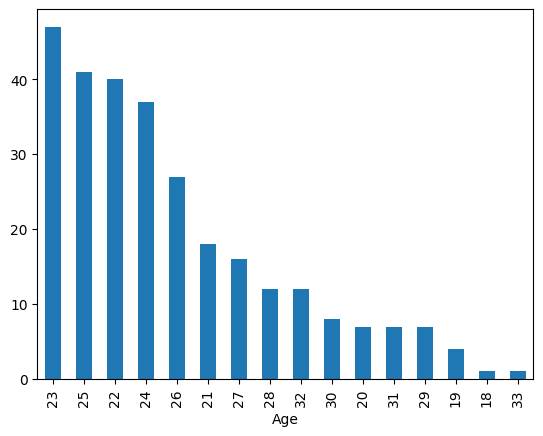

In [ ]:
df['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

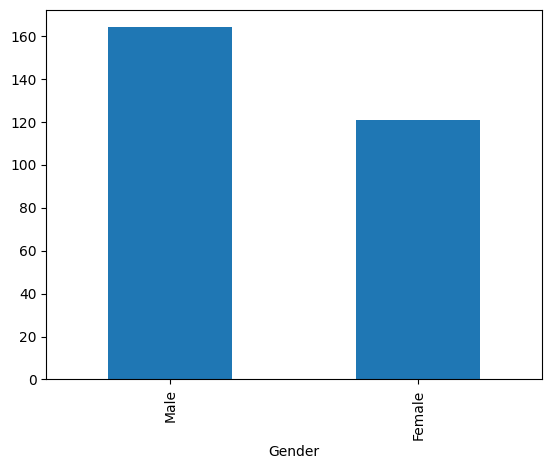

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

# Age of Customer and their Gender

In [ ]:
pd.crosstab(df['Gender'] , df['Age'])

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Gender,,,,,,,,,,,,,,,,
Female,0,1,3,5,17,22,22,13,10,9,4,4,2,3,6,0
Male,1,3,4,13,23,25,15,28,17,7,8,3,6,4,6,1


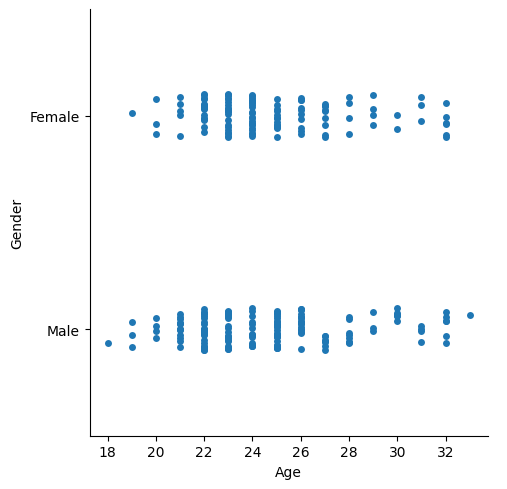

In [ ]:
sns.catplot(data=df , x='Age' , y='Gender')

<Axes: xlabel='Marital Status'>

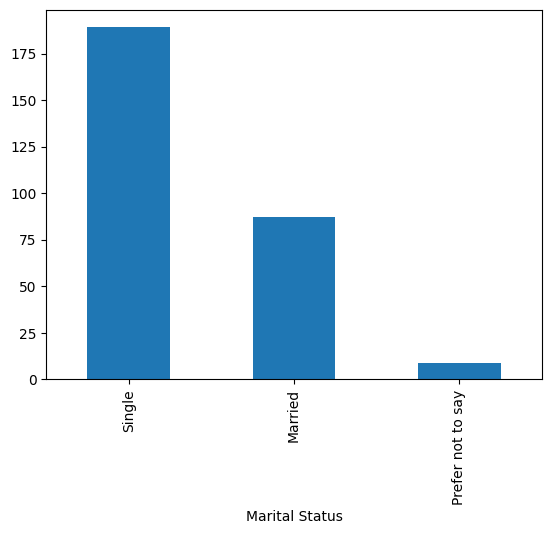

In [ ]:
df['Marital Status'].value_counts().plot(kind='bar')

# Gender of Customer and their Marital Status

In [ ]:
pd.crosstab(df['Marital Status'] , df['Gender'])

Gender,Female,Male
Marital Status,,
Married,42,45
Prefer not to say,5,4
Single,74,115


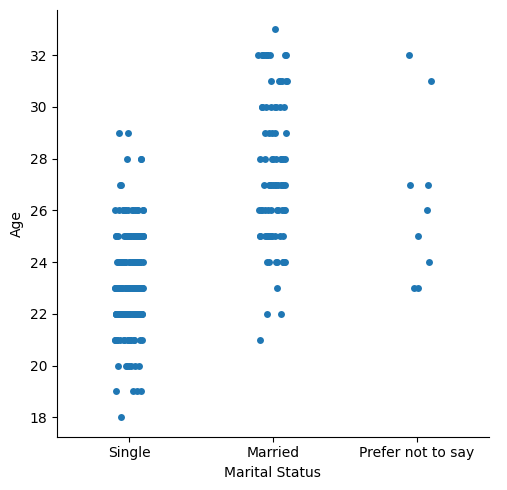

In [ ]:
sns.catplot(data=df , x='Marital Status' , y='Age')

<Axes: xlabel='Occupation'>

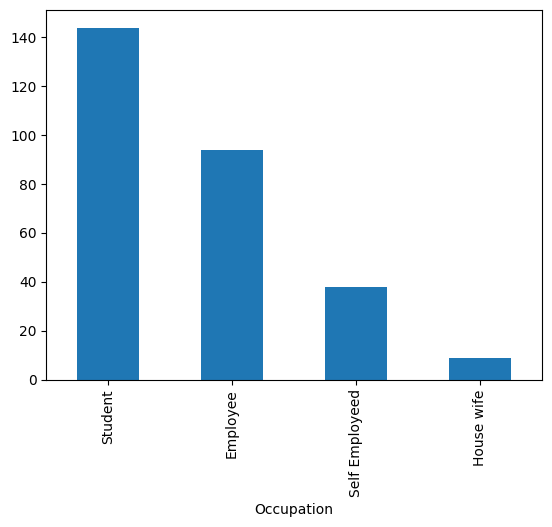

In [ ]:
df['Occupation'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='Occupation'>

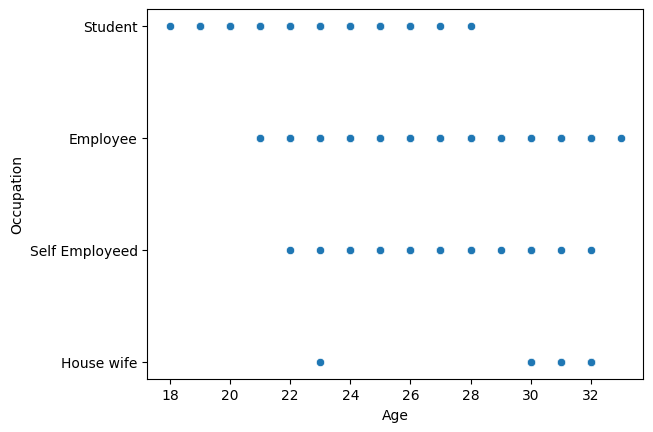

In [ ]:
sns.scatterplot(data=df , x='Age' , y='Occupation')

# Make a different Gender Columns with their Ocupation and  with their Marital Status

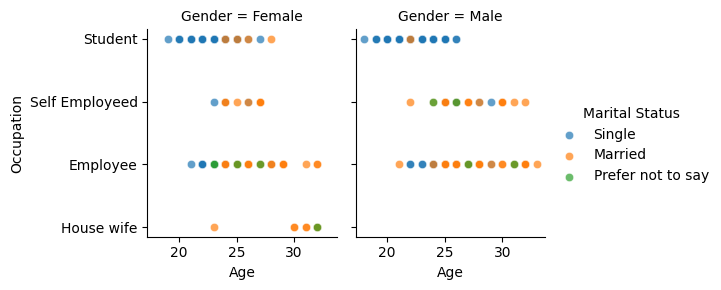

In [ ]:
g = sns.FacetGrid(df, col="Gender", hue="Marital Status")
g.map(sns.scatterplot, "Age", "Occupation", alpha=.7)
g.add_legend()

# Whats the Monthly Income of Customer

<Axes: xlabel='Monthly Income'>

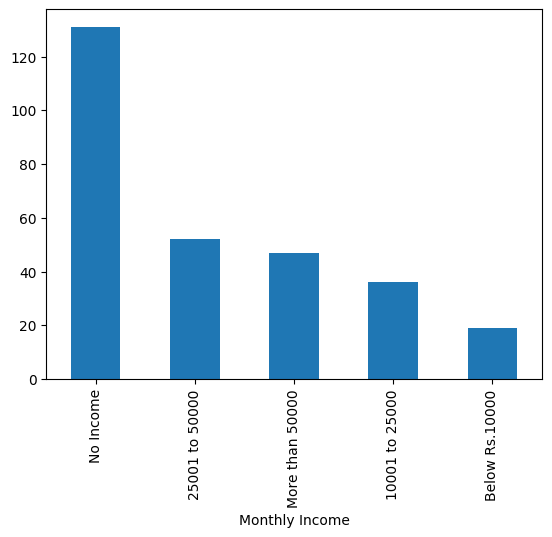

In [ ]:
df['Monthly Income'].value_counts().plot(kind='bar')

# How does the distribution of monthly income vary across different occupations?

<Figure size 600x600 with 0 Axes>

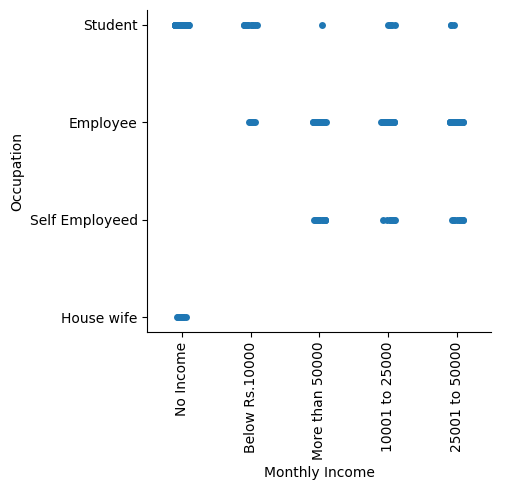

In [ ]:
plt.figure(figsize=(6, 6))
sns.catplot(data=df , x='Monthly Income' , y='Occupation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df['Occupation'] , df['Monthly Income'])

Monthly Income,10001 to 25000,25001 to 50000,Below Rs.10000,More than 50000,No Income
Occupation,,,,,
Employee,21,38,6,29,0
House wife,0,0,0,0,9
Self Employeed,10,11,0,17,0
Student,5,3,13,1,122


# How does monthly income relate to age among individuals of different marital statuses?

<Figure size 600x600 with 0 Axes>

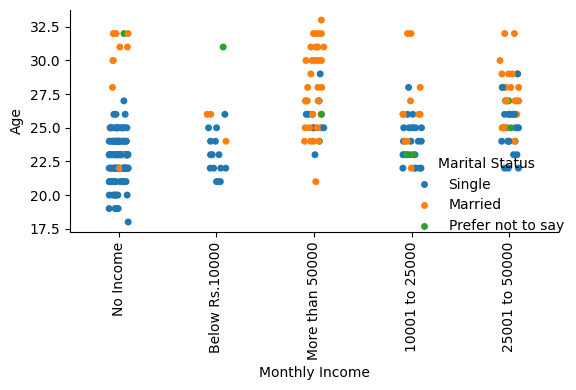

In [ ]:
plt.figure(figsize=(6, 6))
sns.catplot(data=df  , x="Monthly Income" , y='Age' , hue='Marital Status', height=4, aspect=1 )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Whats the Occupation of Customer and their Qualification ?

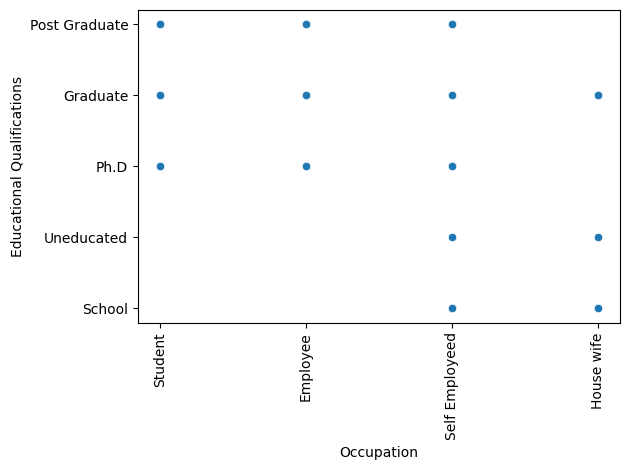

In [ ]:
sns.scatterplot(data=df , x='Occupation' , y='Educational Qualifications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df['Occupation'] , df['Educational Qualifications'])

Educational Qualifications,Graduate,Ph.D,Post Graduate,School,Uneducated
Occupation,,,,,
Employee,50,12,32,0,0
House wife,3,0,0,5,1
Self Employeed,19,3,9,6,1
Student,54,6,84,0,0


# Education and Family Size of Customer

In [ ]:
pd.crosstab(df['Educational Qualifications'] , df['Family size'])

Family size,1,2,3,4,5,6
Educational Qualifications,,,,,,
Graduate,7,37,36,20,15,11
Ph.D,1,2,7,3,7,1
Post Graduate,10,35,40,21,12,7
School,0,1,3,0,3,4
Uneducated,0,0,1,1,0,0


# What is the distribution of family sizes among customers, and how do their marital status and educational qualifications are ?

<Axes: xlabel='Educational Qualifications', ylabel='Family size'>

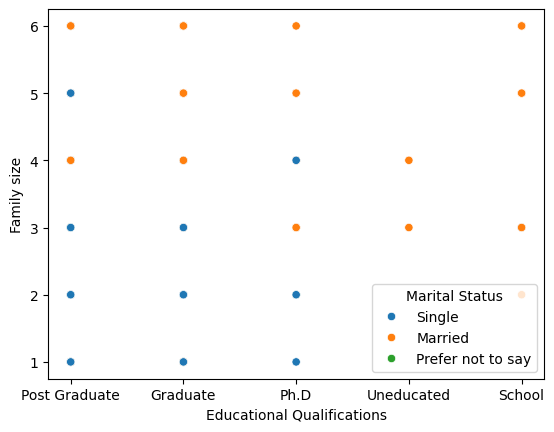

In [ ]:
sns.scatterplot(data=df , x='Educational Qualifications' , y='Family size' , hue='Marital Status')

# What is the distribution of family sizes among customers, and how does their occupation and marital status are?

<Axes: xlabel='Occupation', ylabel='Family size'>

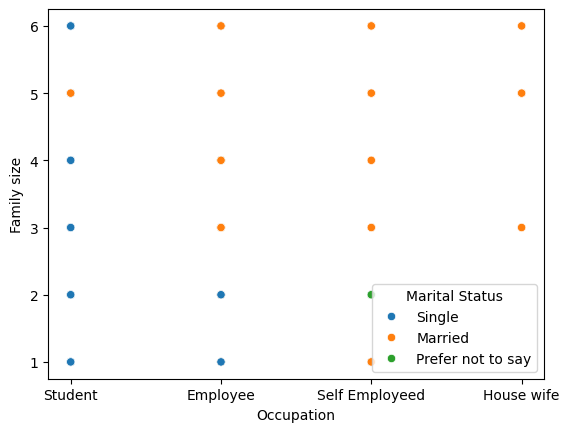

In [ ]:
sns.scatterplot(data=df , x='Occupation' , y='Family size' , hue='Marital Status')

# Whats the age of Customer and their Monthly Income?

In [ ]:
pd.crosstab( df['Monthly Income'] , df['Age'] )

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Monthly Income,,,,,,,,,,,,,,,,
10001 to 25000,0,0,0,0,6,7,6,6,6,1,2,0,0,0,2,0
25001 to 50000,0,0,0,0,3,2,6,10,9,8,6,5,1,0,2,0
Below Rs.10000,0,0,0,3,4,3,3,2,3,0,0,0,0,1,0,0
More than 50000,0,0,0,1,0,1,5,9,6,6,3,2,5,4,4,1
No Income,1,4,7,14,27,34,17,14,3,1,1,0,2,2,4,0


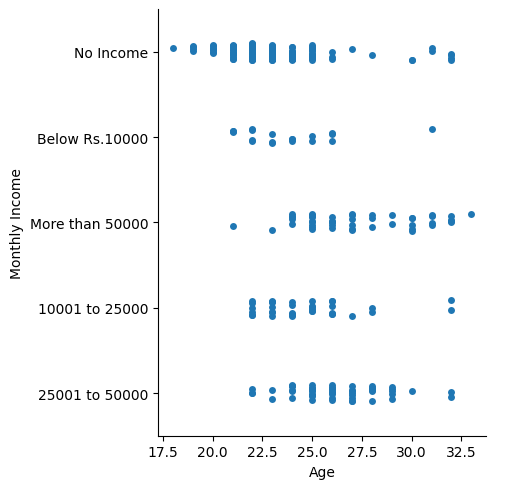

In [ ]:
sns.catplot(data=df , x='Age' , y='Monthly Income')

# How much Customer gave Feedback?

<Axes: xlabel='Feedback'>

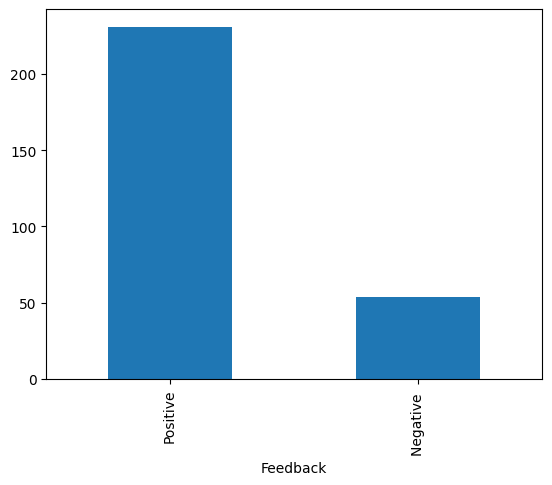

In [ ]:
df['Feedback'].value_counts().plot(kind='bar')

# which Customer gave Feedback and whats their Age ?

In [ ]:
pd.crosstab(df['Feedback'] , df['Age'])

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Feedback,,,,,,,,,,,,,,,,
Negative,0,1,1,4,3,6,6,5,9,3,4,3,4,1,3,1
Positive,1,3,6,14,37,41,31,36,18,13,8,4,4,6,9,0


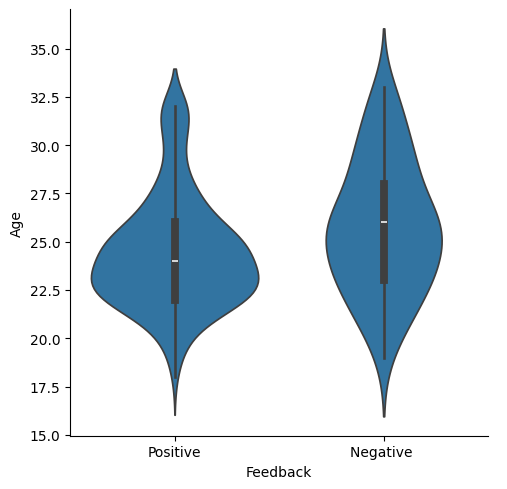

In [ ]:
sns.catplot(data=df , x='Feedback' , y='Age' , kind="violin")

# Age of Customer Who gave Feedback and their Gender

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


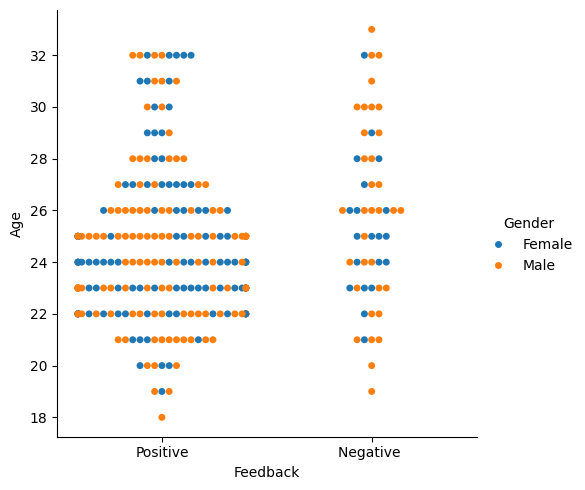

In [18]:
sns.catplot(data=df , x='Feedback' , y='Age' ,hue='Gender' , kind="swarm")
plt.show()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes
